<a href="https://colab.research.google.com/github/yutao-data/Financial-Calculator/blob/main/unemployment_vs_InterestRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas_datareader import data as pdr
import datetime
import tushare as ts

ts.set_token('bd21298d19c94dba1adeca3d4f2296ce49b61dc8138eb632050fd4f0')
pro = ts.pro_api()

# US unemployment Rate vs Interest Rate

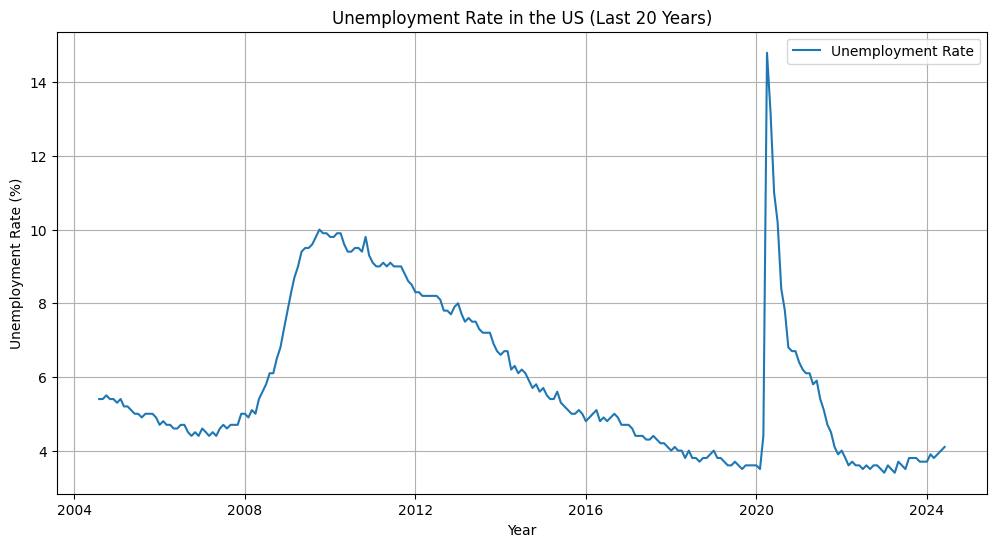

In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=20*365)

unemployment_data = pdr.get_data_fred('UNRATE', start=start_date, end=end_date)

plt.figure(figsize=(12, 6))
plt.plot(unemployment_data.index, unemployment_data['UNRATE'], label='Unemployment Rate')
plt.title('Unemployment Rate in the US (Last 20 Years)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

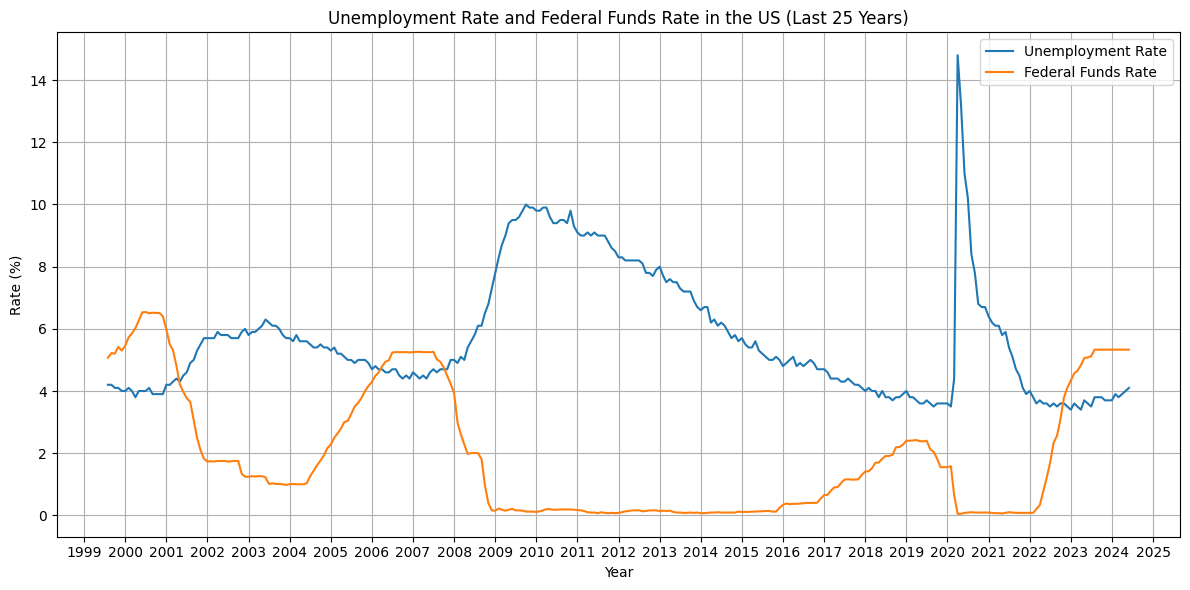

In [3]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=25*365)

unemployment_data = pdr.get_data_fred('UNRATE', start=start_date, end=end_date)
fed_rate_data = pdr.get_data_fred('FEDFUNDS', start=start_date, end=end_date)

combined_data = pd.merge(unemployment_data, fed_rate_data, left_index=True, right_index=True, how='inner')
combined_data.columns = ['Unemployment Rate', 'Federal Funds Rate']

plt.figure(figsize=(12, 6))

plt.plot(combined_data.index, combined_data['Unemployment Rate'], label='Unemployment Rate')
plt.plot(combined_data.index, combined_data['Federal Funds Rate'], label='Federal Funds Rate')
plt.title('Unemployment Rate and Federal Funds Rate in the US (Last 25 Years)')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

# China Interest Rate

<ipython-input-4-72530113ea28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_rate_data['date'] = pd.to_datetime(china_rate_data['date'])
<ipython-input-4-72530113ea28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_rate_data.rename(columns={'1y': 'Interest Rate'}, inplace=True)


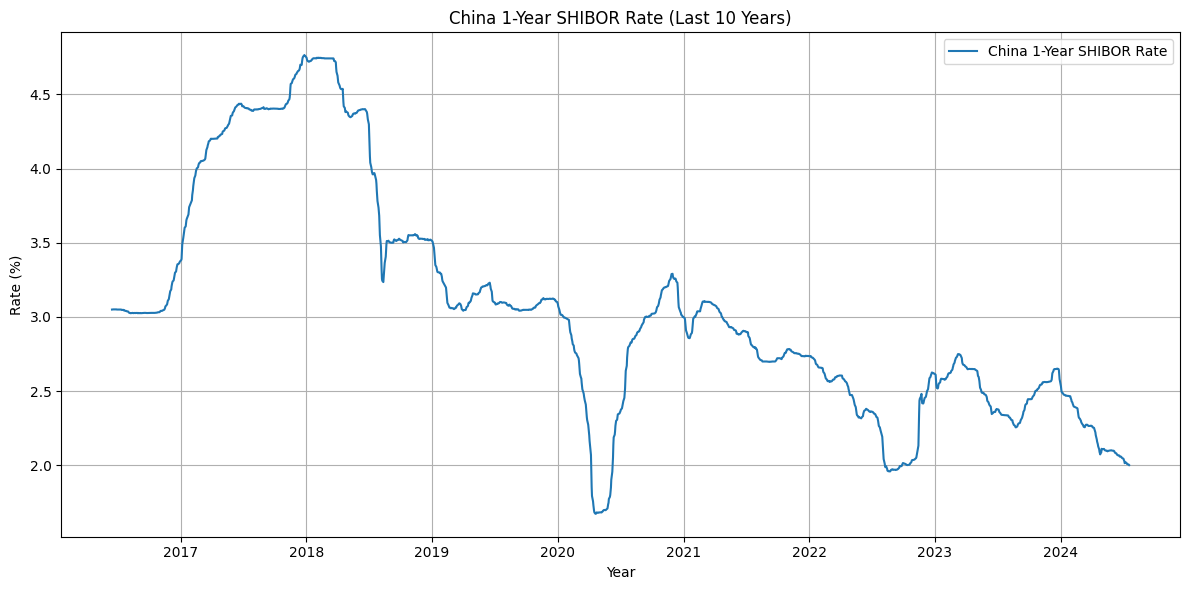

In [4]:
end_date = datetime.datetime.now().strftime('%Y%m%d')
start_date = (datetime.datetime.now() - datetime.timedelta(days=10*365)).strftime('%Y%m%d')

df = pro.shibor(start_date=start_date, end_date=end_date)

china_rate_data = df[['date', '1y']]
china_rate_data['date'] = pd.to_datetime(china_rate_data['date'])
china_rate_data.set_index('date', inplace=True)
china_rate_data.rename(columns={'1y': 'Interest Rate'}, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(china_rate_data.index, china_rate_data['Interest Rate'], label='China 1-Year SHIBOR Rate')
plt.title('China 1-Year SHIBOR Rate (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()